In [5]:
from __future__ import division
import sympy
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from sympy import pprint as pp

# Enable LaTeX-based rendering
#%load_ext sympy.interactive.ipythonprinting
# New way of setting printing:
from sympy import init_printing
init_printing()

from IPython.display import display
from IPython.display import Image

# 1 - Design parameters
<img src="https://raw.githubusercontent.com/ubuntuslave/omnistereo_sensor_design/master/images/geometric_model.png" title='Geometric Model' width='300px' alt='Omnistereo Geometric Model' />

In [ ]:
w, h, b, d, c1, c2, k1, k2, r_sys, r_ref = symbols("w, h, b, d, c_1, c_2, k_1, k_2, r_{sys}, r_{ref}", real=True)
# Constraints for hyperboloids:
k1_constraint = k1 > 2
k2_constraint = k2 > 2
c1_constraint = c1 > 0
c2_constraint = c2 > 0
xw, yw, zw = symbols("x_w, y_w, z_w", real=True)
# Local image:
# Image(filename='../images/geometric_model.png')

## System Height

From `Geometry Expressions`, we obtain:

$h=
\left\lvert{\dfrac{c_{1}}{2} + \dfrac{c_{2}}{2} - d + \sqrt{\dfrac{c_{1}^{2} \left(k_{1} - 2\right)}{4 k_{1}} + w^{2} \left(\dfrac{k_{1}}{2} + 1\right)} + \sqrt{\dfrac{c_{2}^{2} \left(k_{2} - 2\right)}{4 k_{2}} + w^{2} \left(\dfrac{k_{2}}{2} + 1\right)}}\right\rvert
$

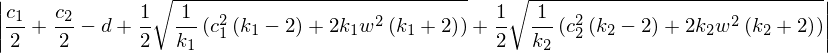

b - c₁ - c₂ + d


In [322]:
h_eqn = abs((c1/2)+(c2/2) - d + sqrt((k1-2)*(c1)**(2)/(4*k1)+ (w**2)*(1+k1/2))+ sqrt((k2-2)*(c2)**(2)/(4*k2)+ (w**2)*(1+k2/2)))
h_eqn
display(simplify(h_eqn))
baseline_eqn = b-(c1 + c2 - d)
pp(baseline_eqn)
#print(sympy.latex(h_eqn))
#h_eqn
#print(sympy.latex(baseline_eqn))
baseline_sln = solve(baseline_eqn, b)
display(baseline_sln)


## Lens Hole Radius

From `Geometry Expressions`, we obtain:

$\beta = arctan\left (\dfrac{r_{sys}}{\dfrac{c_{1}}{2}+\sqrt{\dfrac{c_{1}^{2}\cdot \left (-2+k_{1}\right )}{4\cdot k_{1}}+r_{sys}^{2}\cdot \left (-1+\dfrac{k_{1}}{2}\right )}}\right )$

$r_{\beta} =\begin{array}{l}\dfrac{\sqrt{k_{1}}\cdot r_{sys}\cdot \left (2\cdot d\cdot \sqrt{k_{2}}-c_{2}\cdot \sqrt{k_{2}}-c_{2}\cdot \sqrt{-2+k_{2}}\right )}{\sqrt{k_{2}}\cdot \left (c_{1}\cdot \sqrt{k_{1}}+\sqrt{-2\cdot c_{1}^{2}+c_{1}^{2}\cdot k_{1}-4\cdot k_{1}\cdot r_{sys}^{2}+2\cdot k_{1}^{2}\cdot r_{sys}^{2}}\right )}\\d-\dfrac{c_{2}}{2}-\dfrac{c_{2}\cdot \sqrt{-2+k_{2}}}{2\cdot \sqrt{k_{2}}}>0\end{array}$

# 2 - Mirror profiles (expressions)

## Mirror 1 (Top)

\begin{align}
 {\left(z_1 - \frac{{{c_1}}}{2} \right)^2} - ({x_1^2} + {y_1^2})\left(\frac{{{k_1}}}{2} - 1\right) &= \frac{{c_1^2}}{4}\left(\frac{{{k_1} - 2}}{{{k_1}}}\right)
\end{align}

In [294]:
x1, y1, z1 = symbols("x_1, y_1, z_1", real=True)

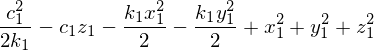

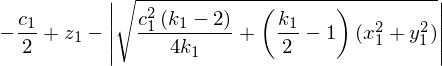

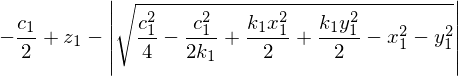

In [324]:
mirror_1_eqn = (z1 - c1/2)**2 - (x1**2 + y1**2)*(k1/2 - 1) - (c1**2/4)*((k1 - 2)/k1) 
display(expand(mirror_1_eqn))
mirror_1_eqn_top = z1 - c1/2 - abs(sqrt((x1**2 + y1**2)*(k1/2 - 1) + (c1**2/4)*((k1 - 2)/k1)))
display(mirror_1_eqn_top)
display(expand(mirror_1_eqn_top))

## Line passing through points $P_w$ and $F_1$ 

### Line equations:

In [296]:
lambda1, s1 = symbols("lambda_1, s_1", real=True)
pos_F1 = (0, 0, c1)

x1_on_line = xw + s1 * (pos_F1[0]-xw)
display(x1_on_line)

y1_on_line = yw + s1 * (pos_F1[1]-yw)
display(y1_on_line)

z1_on_line = zw + s1 * (pos_F1[2]-zw)
display(z1_on_line)

Let $\lambda_1 = 1 - s_1$, so that:

In [297]:
s1_eqn = 1 - lambda1

xr1_on_line = simplify(x1_on_line.subs({s1: s1_eqn}))
display(xr1_on_line)

yr1_on_line = simplify(y1_on_line.subs({s1: s1_eqn}))
display(yr1_on_line)

zr1_on_line = expand(z1_on_line.subs({s1: s1_eqn}))
display(zr1_on_line)

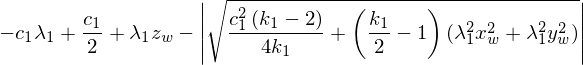

In [298]:
mirror_1_intersection = mirror_1_eqn_top.subs({x1: xr1_on_line, y1: yr1_on_line, z1:zr1_on_line})
display(mirror_1_intersection)

## Solving for intersection point $P_1$ 

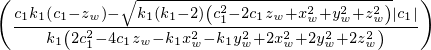

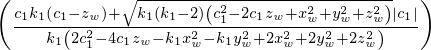

In [299]:
lambda1_sln = solve([mirror_1_intersection], lambda1)
lambda1_sln_minus = simplify(lambda1_sln[0])
display(lambda1_sln_minus)
lambda1_sln_plus = together(lambda1_sln[1])
display(lambda1_sln_plus)

In [300]:
lambda1_func_minus = lambdify([c1, k1, xw, yw, zw], lambda1_sln_minus, modules=['numpy'])
lambda1_func_plus = lambdify([c1, k1, xw, yw, zw], lambda1_sln_plus, modules=['numpy'])

$\lambda_1$, can be simplified to be

\begin{align}
    \lambda_1=\frac{c_1}{L_{v_1} \sqrt{k_1\cdot(k_1 - 2)} 
    + k_1 \left(c_1 - z_w \right)}
\end{align}

where $L_{v_1} = ||{\vec{f_1} - \vec{p_w}}|| =|\sqrt{x_w^2+y_w^2+(c_1 - z_w)^2} |$, which is the distance between $P_w$
and mirror 1's focus point $F_1$.


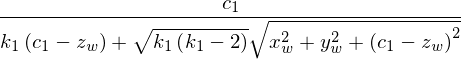

In [301]:
L1w = sqrt(xw**2 + yw**2 + (c1-zw)**2)
lambda1_simple = c1/(L1w*sqrt(k1*(k1-2)) + k1*(c1-zw))
display(lambda1_simple)
lambda1_simple_den = (abs(sqrt(k1*(k1-2)*xw**2 + yw**2 + (c1-zw)**2)) + k1*(c1-zw))
den1_simple = lambda1_simple_den*lambda1_simple_den

## Mirror 2 (Bottom)

\begin{align}
  {\left(z_2 - \left(d - \frac{c_2}{2}\right) \right)^2} - ({x_2^2} + {y_2^2})\left(\frac{{{k_2}}}{2} - 1\right) &= \frac{{c_2^2}}{4}\left(\frac{{{k_2} - 2}}{{{k_2}}}\right)
\end{align}

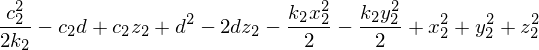

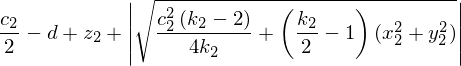

In [325]:
x2, y2, z2, = symbols("x_2, y_2, z_2", real=True)
mirror_2_eqn = (z2 - (d-c2/2))**2 - (x2**2 + y2**2)*(k2/2 - 1) - (c2**2/4)*((k2 - 2)/k2)
display(expand(mirror_2_eqn))
mirror_2_eqn_bottom = z2 - d + c2/2 + abs(sqrt((x2**2 + y2**2)*(k2/2 - 1) + (c2**2/4)*((k2 - 2)/k2)))
display(mirror_2_eqn_bottom)

## Line passing through points $P_w$ and $F_2$ 

### Line equations:

In [303]:
lambda2, s2 = symbols("lambda_2, s_2", real=True)
pos_F2 = (0, 0, d - c2)

x2_on_line = xw + s2 * (pos_F2[0]-xw)
display(x2_on_line)

y2_on_line = yw + s2 * (pos_F2[1]-yw)
display(y2_on_line)

z2_on_line = zw + s2 * (pos_F2[2] - zw) 
display(z2_on_line)

Let $\lambda_2 = 1 - s_2$, so that:

In [304]:
s2_eqn = 1 - lambda2

xr2_on_line = simplify(x2_on_line.subs({s2: s2_eqn}))
display(xr2_on_line)

yr2_on_line = simplify(y2_on_line.subs({s2: s2_eqn}))
display(yr2_on_line)

zr2_on_line = simplify(z2_on_line.subs({s2: s2_eqn}))
display(zr2_on_line)
display(expand(zr2_on_line))
display(zw*lambda2 + (d-c2)*(1-lambda2))

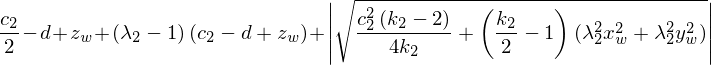

In [305]:
mirror_2_intersection = mirror_2_eqn_bottom.subs({x2: xr2_on_line, y2: yr2_on_line, z2:zr2_on_line})
display(mirror_2_intersection)

## Solving for intersection point $P_2$ 

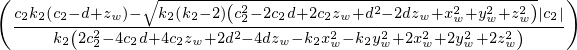

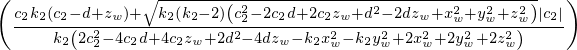

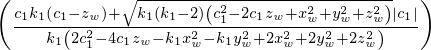

In [306]:
lambda2_sln = solve([mirror_2_intersection], lambda2)
lambda2_sln_minus = simplify(lambda2_sln[0])
display(lambda2_sln_minus)
lambda2_sln_plus = simplify(lambda2_sln[1])
display(lambda2_sln_plus)
display(lambda1_sln_plus)

In [307]:
lambda2_func_minus = lambdify([c2, k2, xw, yw, zw, d], lambda2_sln_minus, modules=['numpy'])
lambda2_func_plus = lambdify([c2, k2, xw, yw, zw, d], lambda2_sln_plus, modules=['numpy'])

$\lambda_2$, can be simplified to be

\begin{align}
    \lambda_2=\frac{c_2}{L_{v_2} \sqrt{k_2\cdot(k_2 - 2)} 
    - k_2 \left(d-c_2-z_w \right)}
\end{align}

where $L_{v_2} = ||{\vec{f_2} - \vec{p_w}}|| =|\sqrt{x_w^2+y_w^2+(d-c_2-z_w)^2} |$, which is the distance between $P_w$
and mirror 2's focus point $F_2$.


In [308]:
display(expand(d - lambda2*zw - (d - c2)*(1 - lambda2)))
display(expand(c2 + lambda2*(d - c2 - zw)))

## Fielf of View Angles

From `Geometry Expressions`, we obtain:


\begin{align}
\theta_{1,max} = -arctan\left (\dfrac{c_{1}\cdot \sqrt{k_{1}}-\sqrt{-2+k_{1}}\cdot \sqrt{c_{1}^{2}+2\cdot k_{1}\cdot r_{sys}^{2}}}{2\cdot \sqrt{k_{1}}\cdot r_{sys}}\right )
\end{align}

or by `Mathematica`:

\begin{align}
\frac{\arctan \left(\sqrt{\frac{(k_1-2) \left(c_1^2+2 k_1 r^2_{sys} \right)}{k_1}}-c_1\right)}{2 r_{sys}}
\end{align}

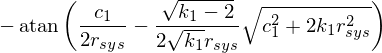

In [309]:
theta_1_max_eqn = -atan((c1* sqrt(k1)-sqrt(-2+k1)* sqrt(c1**2 + 2* k1 * r_sys**2))/(2*sqrt(k1) * r_sys))
display(ratsimp(theta_1_max_eqn))

From `Geometry Expressions`, we obtain:

$$\theta_{1,min} = \arctan\left (\dfrac{\dfrac{-d}{2}+c_{1}}{r_{ref}}\right )$$

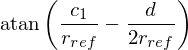

In [310]:
theta_1_min_eqn = atan((-d/2+c1)/(r_ref))
display(cancel(theta_1_min_eqn))

From `Geometry Expressions`, we obtain:

$\theta_{2,min} = arctan\left (\dfrac{\dfrac{-c_{2}}{2}+\sqrt{\dfrac{c_{2}^{2}\cdot \left (-2+k_{2}\right )}{4\cdot k_{2}}+r_{sys}^{2}\cdot \left (-1+\dfrac{k_{2}}{2}\right )}}{r_{sys}}\right )$

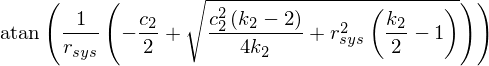

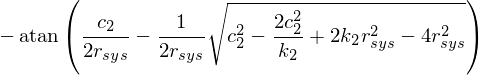

In [311]:
theta_2_min_eqn = atan((-c2/2 + sqrt((c2**2 *(-2+k2))/(4*k2)+r_sys**2 * (-1+k2/2)))/r_sys)
display(trigsimp(theta_2_min_eqn))
display(cancel(theta_2_min_eqn))


# Back Projections

## BP Mirror 1:

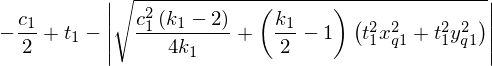

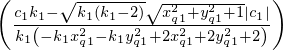

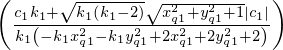

In [314]:
q1, xq1, yq1, zq1, t1, theta1, phi1 = symbols("q_1, x_q1, y_q1, z_q1, t_1, theta_1, phi_1", real=True)
x1_bp_line_eqn = t1*xq1
y1_bp_line_eqn = t1*yq1
z1_bp_line_eqn = t1
mirror1_bp_intersection = mirror_1_eqn_top.subs({x1: x1_bp_line_eqn, y1: y1_bp_line_eqn, z1:z1_bp_line_eqn})
display(mirror1_bp_intersection)
t1_sln = solve([mirror1_bp_intersection], t1)
t1_sln_minus = simplify(t1_sln[0])
display(t1_sln_minus)
t1_sln_plus = together(t1_sln[1])
display(t1_sln_plus)

Simplifying the `+`  solution of $t_1$, we get:
\begin{align}
    t_1=\frac{c_1}{k_1-||{q_1}||\sqrt{k_1\cdot(k_1 - 2)}}
\end{align}

## BP Mirror 2:

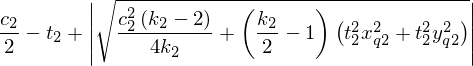

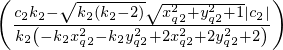

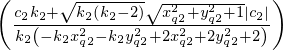

In [318]:
q2, xq2, yq2, zq2, t2, theta2, phi2 = symbols("q_2, x_q2, y_q2, z_q2, t_2, theta_2, phi_2", real=True)
x2_bp_line_eqn = t2*xq2
y2_bp_line_eqn = t2*yq2
z2_bp_line_eqn = d-t2
mirror2_bp_intersection = mirror_2_eqn_bottom.subs({x2: x2_bp_line_eqn, y2: y2_bp_line_eqn, z2:z2_bp_line_eqn})
display(mirror2_bp_intersection)
t2_sln = solve([mirror2_bp_intersection], t2)
t2_sln_minus = simplify(t2_sln[0])
display(t2_sln_minus)
t2_sln_plus = together(t2_sln[1])
display(t2_sln_plus)

## Test and Plot Forward Projections

In [290]:
from __future__ import division
from __future__ import print_function

def get_R(x,y,z):
    return np.sqrt(x**2 + y**2 + z**2)

def get_lambda(x,y,z, c, k, d, lambda_func):
    n_args = lambda_func.func_code.co_argcount 
    if n_args == 5:
        return lambda_func(c,k,x,y,z)
    if n_args == 6:
        return lambda_func(c,k,x,y,z,d)

def get_reflection_point_top(xw, yw, zw, c1, lamb, d):
    xr = lamb*xw
    yr = lamb*yw
    zr = zw*lamb + c1*(1-lamb)
    dist_sq = (xw-xr)**2 + (yw-yr)**2 + (zw-zr)**2
    return xr, yr, zr, dist_sq

def get_reflection_point_bottom(xw, yw, zw, c2, lamb, d):
    xr = lamb*xw
    yr = lamb*yw
    zr = zw*lamb + (d-c2)*(1-lamb)
    dist_sq = (xw-xr)**2 + (yw-yr)**2 + (zw-zr)**2
    return xr, yr, zr, dist_sq

# NOTE:
#     We observed that for the minus form solution works all the time for both mirrors
def get_reflection_point(xw, yw, zw, c, k, d, ref_func, lamb_func_minus, lamb_func_plus):
    print("PROJECTING World Point (%f,%f,%f)" % (xw,yw,zw))

    lambda_answers_minus = get_lambda(xw,yw,zw,c,k,d, lamb_func_minus)
    lambda_answers_plus = get_lambda(xw,yw,zw,c,k,d, lamb_func_plus)
    
    has_answer = True # Initial assumption that an answer exists

    if len(lambda_answers_minus) > 0:
        print("Len of lambda_answers_minus", len(lambda_answers_minus))
        # Choose the answer that produces the shortest segment between Pw and reflection point
        lamb_minus = lambda_answers_minus[0]
        xr_minus, yr_minus, zr_minus, len2F1_minus = ref_func(xw, yw, zw, c, lamb_minus, d)
        print("Lambda (with -)", lamb_minus, "Pw2F1 length = ", len2F1_minus, "Ref. Pt.", xr_minus, yr_minus, zr_minus)

    if len(lambda_answers_plus) > 0:
        lamb_plus = lambda_answers_plus[0]
        print("Len of lambda_answers_plus", len(lambda_answers_plus))
        xr_plus, yr_plus, zr_plus, len2F1_plus = ref_func(xw, yw, zw, c, lamb_plus, d)
        print("Lambda (with +)", lamb_plus, "Pw2F1 length = ", len2F1_plus, "Ref. Pt.", xr_plus, yr_plus, zr_plus)

    if len(lambda_answers_minus) > 0 and len(lambda_answers_plus) > 0:
        print("Got both answers, choosing: ", end="")
        if len2F1_plus > len2F1_minus:
            xr, yr, zr = xr_minus, yr_minus, zr_minus
            print("Minus")
        else:
            xr, yr, zr = xr_plus, yr_plus, zr_plus
            print("Plus")
    elif len(lambda_answers_minus) > 0:
        xr, yr, zr = xr_minus, yr_minus, zr_minus
        print("Answer from Minus")
    elif len(lambda_answers_plus) > 0:
        xr, yr, zr = xr_plus, yr_plus, zr_plus
        print("Answer from Plus")
    else:
        has_answer = False
        print("No answer!")
eqn:ray_c_p1
    if has_answer:    
        print("World Point (%f,%f,%f) reflects at: (%f,%f,%f)" % (xw,yw,zw,xr,yr,zr))
        return xr, yr, zr
    else:
        return np.nan, np.nan, np.nan
    
def get_lambda_bottom_guo(x,y,z, c2, k2,d):
    return c2/(np.sqrt(k2*(k2-2))*get_R(x,y,d-c2-z)-k2*(d-c2-z))

def get_lambda_top_guo(x,y,z, c1, k1):
    return c1/(np.sqrt(k1*(k1-2))*get_R(x,y,c1-z)+k1*(c1-z))

def get_reflection_point_bottom_GUO(xw, yw, zw,c2,k2,d,get_ref_func):
    lamb = get_lambda_bottom_guo(xw,yw,zw,c2,k2,d)
    print("Mirror 2: Guo's lambda = %f)" % lamb)
    xr, yr, zr, dist_to_focus = get_ref_func(xw, yw, zw, c2, lamb,d)
    return xr, yr, zr

def get_reflection_point_top_GUO(xw, yw, zw,c1,k1,d,get_ref_func):
    lamb = get_lambda_top_guo(xw,yw,zw,c1,k1)
    print("Mirror 1: Guo's lambda = %f)" % lamb)
    xr, yr, zr, dist_to_focus = get_ref_func(xw, yw, zw, c1, lamb,d)
    return xr, yr, zr

def get_z1_hyperbola(x1, y1, c1, k1):
    z1 = c1/2.0 + np.sqrt((c1**2)/4*(k1-2)/k1 + (x1**2 + y1**2)*(k1/2.0-1.0))
    return z1

def get_z2_hyperbola(x2, y2, c2, k2, d):
    z2 = d - c2/2.0 - np.sqrt((c2**2)/4*(k2-2)/k2 + (x2**2 + y2**2)*(k2/2.0-1.0))
    return z2

def draw(c1, c2, k1, k2, d, r_sys, r_reflex, Pw, C, F1, F2, F2p, ax=None):
        '''
        @return the drawn axis corresponding to the parameter ax of the figure
        '''

        is_new_figure = False

        if ax == None:
            is_new_figure = True
            from mpl_toolkits.mplot3d import axes3d
            import matplotlib.pyplot as plt
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')

        # make simple, bare axis lines through space:
        #ax.set_aspect("equal")
        max_axis = 2*r_sys
        ax.set_xlim3d(-max_axis, max_axis)
        ax.set_ylim3d(-max_axis, max_axis)
        #ax.set_zlim3d(-max_axis, max_axis)
        axis_range = (0, max_axis)
        xAxisLine = (axis_range, (0, 0), (0, 0))  # 2 points make the x-axis line at the data extrema along x-axis
        ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')  # make a red line for the x-axis.
        yAxisLine = ((0, 0), axis_range, (0, 0))  # 2 points make the y-axis line at the data extrema along y-axis
        ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'g')  # make a green line for the y-axis.
        zAxisLine = ((0, 0), (0, 0), axis_range)  # 2 points make the z-axis line at the data extrema along z-axis
        ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'b')  # make a blue line
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')

        plot_title = "HyperCata" + " Mirror"
        ax.set_title(plot_title, loc='center')
        # Show name of mirror as text
        # ax.text2D(0.05, 0.95, plot_title, transform=ax.transAxes)
        
        # Draw hyperboloids:
        u = np.linspace(0, 2 * np.pi, 100)
        v = np.linspace(0, r_sys, 100)
        scale = 1.0
        x = scale * np.outer(np.cos(u), v) # + x_offset
        y = scale * np.outer(np.sin(u), v) # + y_offset
        # Top (mirror 1)
        z1 = scale * get_z1_hyperbola(x, y, c1, k1)
        #ax.plot_wireframe(x, y, z, color="g")
        ax.plot_surface(x, y, z1, rstride=6, cstride=6, color='g', alpha=0.25, linewidth=0.05, shade=False)

        # Bottom (mirror 2)
        z2 = scale * get_z2_hyperbola(x, y, c2, k2, d)
        ax.plot_surface(x, y, z2, rstride=6, cstride=6, color='g', alpha=0.25, linewidth=0.05, shade=False)

        # Draw foci of model
        ax.scatter(F1[0], F1[1], F1[2], color="blue", s=20)
        ax.text(F1[0] + 0.1, F1[1]+0.1, F1[2], "F1", color="blue")
        ax.scatter(C[0], C[1], C[2], color="blue", s=20)
        ax.text(C[0] + 0.1, C[1] + 0.1, C[2], "C, F1'", color="blue")
        ax.scatter(F2[0], F2[1], F2[2], color="red", s=20)
        ax.text(F2[0] + 0.1, F2[1]+0.1, F2[2], "F2", color="red")

        # Draw normalized projection plane        
        # create grid of x,y values
        plane_width = 6.
        plane_height = 4.
        # Recall that stop in range is non-inclusive.
        z_n = 1.0
        xx, yy = np.meshgrid(np.arange(-plane_width / 2, plane_width / 2 + 1, 0.5),
                         np.arange(-plane_height / 2, plane_height / 2 + 1, 0.5))
        # calculate corresponding z = -(a*x+b*y-d)/c
        zz = z_n + np.zeros_like(xx)
        ax.plot_wireframe(xx, yy, zz, color="yellow")
        ax.text(plane_width / 4, 0, z_n + 0.2, "Proj. Norm. Plane", color='brown', zdir='y')

        # Draw test points        
        for p in Pw:
            (xw, yw, zw) = p
            ax.scatter(xw, yw, zw, color="black", s=20)
            ax.text(xw + 0.1, yw+0.1, zw, "Pw", color="black")

            print("MIRROR 1:")
            xr1, yr1, zr1 = get_reflection_point(xw,yw,zw,c1,k1,d,get_reflection_point_top,lambda1_func_minus,lambda1_func_plus)
            xr1, yr1, zr1 = get_reflection_point_top_GUO(xw, yw, zw,c1,k1,d,get_reflection_point_top)
            print("World Point (%f,%f,%f) reflects at: (%f,%f,%f)" % (xw,yw,zw,xr1,yr1,zr1))

            ax.scatter(xr1, yr1, zr1, color="blue", s=20)
            ax.text(xr1 + 0.1, yr1+0.1, zr1, "P1", color="blue")

            # Plot the Pw-F1 line segment
            line_PwF1_xs = [xw, F1[0]]
            line_PwF1_ys = [yw, F1[1]]
            line_PwF1_zs = [zw, F1[2]]
            ax.plot3D(line_PwF1_xs, line_PwF1_ys, line_PwF1_zs, color="blue", linestyle='--', linewidth=1.5, alpha=1.0)

            # Project to normalized camera plane
            n1 = 1.0/zr1
            x_n1 , y_n1, z_n1 = xr1*n1, yr1*n1, zr1*n1
            # Draw projected point on camera plane
            ax.scatter(x_n1, y_n1, z_n1, color="blue", s=20)
            #ax.text(x_n1 + 0.1, y_n1 + 0.1, z_n1 + 0.2, "m1", color="blue")
            
            # Draw projection of Pr1 through Camera (C) Pinhole
            line_Pr1C_xs = [xr1, C[0]]
            line_Pr1C_ys = [yr1, C[1]]
            line_Pr1C_zs = [zr1, C[2]]
            ax.plot3D(line_Pr1C_xs, line_Pr1C_ys, line_Pr1C_zs, color="cyan", linestyle='--', linewidth=1.5, alpha=1.0)

            # Reflection via mirror 2:
            print("MIRROR 2:")
            xr2, yr2, zr2 = get_reflection_point(xw,yw,zw,c2,k2,d,get_reflection_point_bottom,lambda2_func_minus,lambda2_func_plus)
            #TODO: use Guo's
            xr2, yr2, zr2 = get_reflection_point_bottom_GUO(xw, yw, zw,c2,k2,d,get_reflection_point_bottom)
            print("World Point (%f,%f,%f) reflects at: (%f,%f,%f)" % (xw,yw,zw,xr2,yr2,zr2))

            ax.scatter(xr2, yr2, zr2, color="red", s=20)
            ax.text(xr2 + 0.1, yr2+0.1, zr2, "P2", color="red")
        
            # Plot the Pw-F2 line segment
            line_PwF2_xs = [xw, F2[0]]
            line_PwF2_ys = [yw, F2[1]]
            line_PwF2_zs = [zw, F2[2]]
            ax.plot3D(line_PwF2_xs, line_PwF2_ys, line_PwF2_zs, color="red", linestyle='--', linewidth=1.5, alpha=1.0)

            # TODO: Project to reflex mirror 
            line_Pr2Ref_xs = [xr2, F2p[0]]
            line_Pr2Ref_ys = [yr2, F2p[1]]
            line_Pr2Ref_zs = [zr2, F2p[2]]
            ax.plot3D(line_Pr2Ref_xs, line_Pr2Ref_ys, line_Pr2Ref_zs, color="pink", linestyle='--', linewidth=1.5, alpha=1.0)
            
            # TODO: Draw projection from reflex to real camera Pinhole

        plt.show()  # Show figure



r_sys = 3.7
r_reflex = 1.72
c1, k1 = 12.34, 5.73
c2, k2 = 24.18, 9.74
d = 23.37
xw, yw, zw = 4, 6 , 15

Pw = [(xw, yw, zw), (-xw, yw, zw), (xw, -yw, zw), (-xw, -yw, zw)]
# Pw = [(xw, yw, zw)]

C = (0, 0, 0)  # F1'
F1 = (0, 0, c1)  # F1
F2 = (0, 0, d - c2)  # F2
F2p = (0, 0, d)  # F2'
f_cam = 1.0
s_cam = 0.0
draw(c1, c2, k1, k2, d, r_sys, r_reflex, Pw, C, F1, F2, F2p)

MIRROR 1:
PROJECTING World Point (4.000000,6.000000,15.000000)
Len of lambda_answers_minus 1
Lambda (with -) 0.608135786666 Pw2F1 length =  9.07150509147 Ref. Pt. 2.43254314667 3.64881472 13.9576411925
Len of lambda_answers_plus 1
Lambda (with +) -0.243032410191 Pw2F1 length =  91.27945659 Ref. Pt. -0.972129640764 -1.45819446115 11.6935337889
Got both answers, choosing: Minus
World Point (4.000000,6.000000,15.000000) reflects at: (2.432543,3.648815,13.957641)
Mirror 1: Guo's lambda = 0.608136)
World Point (4.000000,6.000000,15.000000) reflects at: (2.432543,3.648815,13.957641)
MIRROR 2:
PROJECTING World Point (4.000000,6.000000,15.000000)
Len of lambda_answers_minus 1
Lambda (with -) 0.079313536836 Pw2F1 length =  255.957183733 Ref. Pt. 0.317254147344 0.475881221016 0.443947017376
Len of lambda_answers_plus 1
Lambda (with +) 7.76790329702 Pw2F1 length =  13830.9527232 Ref. Pt. 31.0716131881 46.6074197821 122.000551126
Got both answers, choosing: Minus
World Point (4.000000,6.000000,15.

# Horizontal Depth from Triangulation

From `Geometry Expressions`:

\begin{align}
D=\left |\dfrac{-\left (-d+c_{1}+c_{2}\right )\cdot cos\left (\theta_{1}\right )\cdot cos\left (\theta_{2}\right )}{sin\left (\theta_{2}\right )\cdot cos\left (\theta_{1}\right )+sin\left (\theta_{1}\right )\cdot cos\left (\theta_{2}\right )}\right |
\end{align}

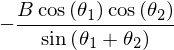

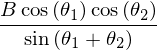

False

In [27]:
theta1, theta2 = symbols("theta_1, theta_2", real=True)
D_eqn = simplify(-B*cos(theta1)*cos(theta2)/(sin(theta2)*cos(theta1)+sin(theta1)*cos(theta2)))
display(D_eqn)
D_eqn_2 = B*sin(pi/2-theta1)*sin(pi/2-theta2)/sin(pi-theta1-theta2)
display(D_eqn_2)
D_eqn == D_eqn_2

# Book Example:

In [116]:
def convert_input(string):
    expr = sympify(string)
    sym, = expr.free_symbols
    x = Symbol(sym.name, real=True)
    expr = expr.subs(sym, x)
    frac = cancel(together(expr))
    return frac, x

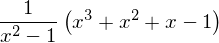

In [117]:
frac, x = convert_input('1/(x+1) + 1/(x-1) + x + 1')
frac

In [118]:
def plot_curve(expr, x, (x_min, x_max), (y_min, y_max)):
    """Plot y=expr(x) over the specified domain"""
    func = lambdify([x], expr)
    xs = np.linspace(x_min, x_max, 200)
    plt.plot(xs, func(xs))
    plt.ylim(y_min, y_max)
    plt.xlim(x_min, x_max)
    
plot_curve(frac, x, (-5, 5), (-10, 10))